In [1]:
"""fraction of expected number of event over number of event assuming no oscilation (294.7 )
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from framework_pkg.total_flux import SuperKFlux

plt.rcParams['text.usetex']=True
plt.style.use('classic')

In [5]:
param = {'SinT12': 0.306, 'M12': 6.9e-5}

total_flux    = SuperKFlux(threshold=4.5, first_day='2015,1,1', last_day='2016,1,1')
spectrum_data = total_flux.modulation_data
#energy_obs    = total_flux.energy_obs

flux_msw = total_flux.__getitem__(param, name="MSW")
flux_pseudodirac = total_flux.__getitem__(param, name="PseudoDirac")

print(flux_msw/5.25)
print()
print(flux_pseudodirac)

[0.43003931]

[1.60401941]


In [8]:
print(total_flux.unoscillated_flux)
print(len(total_flux.efficiency))
print(len(total_flux.frame.response_function))
plt.plot(total_flux.frame.energy_recoil,total_flux.efficiency[0])

[13.78177956]
1


AttributeError: 'FrameWork' object has no attribute 'response_function'

In [6]:
total_flux    = SuperKFlux()
spectrum_data = total_flux.modulation_data
print(spectrum_data[0])

9646.000231481623
[9.64878194e+03 1.96875000e+00 3.21041667e+00 2.74000000e+00
 6.30000000e-01 5.30000000e-01 1.02900000e+00 2.81900000e+00
 6.48000000e-01 5.45000000e-01]
[2.78171296 1.96875    3.21041667 2.74       0.63       0.53
 1.029      2.819      0.648      0.545     ]


In [18]:
live_days = 2055.5
r_exp = 294.7
n_exp = 90406
epsilon =  n_exp /(r_exp * live_days)

print(epsilon)

n_obs = 39786
r_obs = n_obs/(epsilon * live_days)

print(r_obs)

print(5.25 * r_obs/r_exp)


live_days = 2970 
n_obs = 65443

r_obs = r_exp * 2.314 / 5.25
epsilon = n_obs/(r_obs * live_days)
print(r_obs,epsilon)

# for i in range (spectrum_data.shape[0]):
#     print(spectrum_data[i,2] + spectrum_data[i,1])

0.14924494744871222
129.691991681968
2.3104274052607128
129.89253333333332 0.16963777339020875


In [24]:
superk_efficiency = np.array(pd.read_csv('./Data/superk_efficiency.csv'))
modulation_data = np.loadtxt('./Data/sksolartimevariation5804d.txt')
modulation_data[:, :3] /= (60. * 60. * 24.) 

In [5]:
print(modulation_data.shape)

(1343, 10)


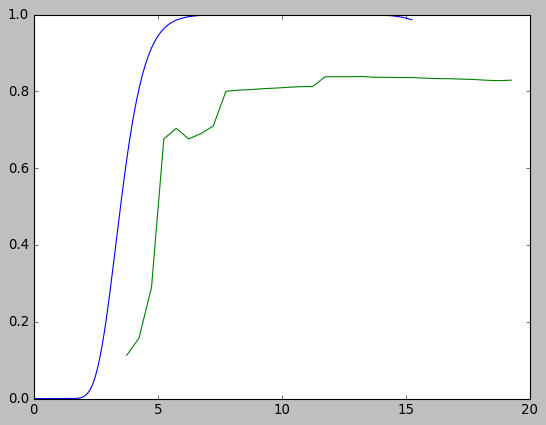

In [27]:
plt.plot(total_flux.frame.energy_recoil, total_flux.response_function[0])
plt.plot(superk_efficiency[:,0],superk_efficiency[:,1])